# Stochastic Optimizer Comparison: *classification with Mnist*
- SGD family only

In [1]:
%matplotlib inline
import stochastic_optimizer
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# Original Mnist
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, data_home='.')
X, y = [mnist.data, mnist.target]
X = X/X.max()

## Linear model training

2019-12-30 10:19:46,213 root         INFO     *** Learning Curve Test ***
2019-12-30 10:19:46,214 root         INFO     input shape: 70000, 784
2019-12-30 10:19:46,215 root         INFO     output shape: 70000
2019-12-30 10:19:46,216 root         INFO     train size: 69300.00
2019-12-30 10:19:46,216 root         INFO      training SGD
2019-12-30 10:19:46,217 root         INFO       rounds 1 / 50
2019-12-30 10:21:06,628 root         INFO       rounds 2 / 50
2019-12-30 10:22:28,784 root         INFO       rounds 3 / 50
2019-12-30 10:23:50,743 root         INFO       rounds 4 / 50
2019-12-30 10:25:11,579 root         INFO       rounds 5 / 50
2019-12-30 10:26:32,812 root         INFO       rounds 6 / 50
2019-12-30 10:27:54,502 root         INFO       rounds 7 / 50
2019-12-30 10:29:15,609 root         INFO       rounds 8 / 50
2019-12-30 10:30:36,783 root         INFO       rounds 9 / 50
2019-12-30 10:31:57,710 root         INFO       rounds 10 / 50
2019-12-30 10:33:20,051 root         INFO 

2019-12-30 13:09:39,800 root         INFO       rounds 25 / 50
2019-12-30 13:11:05,350 root         INFO       rounds 26 / 50
2019-12-30 13:12:29,815 root         INFO       rounds 27 / 50
2019-12-30 13:13:54,060 root         INFO       rounds 28 / 50
2019-12-30 13:15:17,691 root         INFO       rounds 29 / 50
2019-12-30 13:16:41,541 root         INFO       rounds 30 / 50
2019-12-30 13:18:07,253 root         INFO       rounds 31 / 50
2019-12-30 13:19:30,753 root         INFO       rounds 32 / 50
2019-12-30 13:20:55,394 root         INFO       rounds 33 / 50
2019-12-30 13:22:19,666 root         INFO       rounds 34 / 50
2019-12-30 13:23:44,334 root         INFO       rounds 35 / 50
2019-12-30 13:25:08,066 root         INFO       rounds 36 / 50
2019-12-30 13:26:32,293 root         INFO       rounds 37 / 50
2019-12-30 13:27:56,974 root         INFO       rounds 38 / 50
2019-12-30 13:29:20,650 root         INFO       rounds 39 / 50
2019-12-30 13:30:45,637 root         INFO       rounds 

2019-12-30 16:27:40,976 root         INFO       rounds 3 / 50
2019-12-30 16:29:05,930 root         INFO       rounds 4 / 50
2019-12-30 16:30:31,147 root         INFO       rounds 5 / 50
2019-12-30 16:31:57,616 root         INFO       rounds 6 / 50
2019-12-30 16:33:21,241 root         INFO       rounds 7 / 50
2019-12-30 16:34:46,484 root         INFO       rounds 8 / 50
2019-12-30 16:36:11,880 root         INFO       rounds 9 / 50
2019-12-30 16:37:36,311 root         INFO       rounds 10 / 50
2019-12-30 16:39:02,086 root         INFO       rounds 11 / 50
2019-12-30 16:40:27,625 root         INFO       rounds 12 / 50
2019-12-30 16:41:52,153 root         INFO       rounds 13 / 50
2019-12-30 16:43:17,775 root         INFO       rounds 14 / 50
2019-12-30 16:44:43,306 root         INFO       rounds 15 / 50
2019-12-30 16:46:06,897 root         INFO       rounds 16 / 50
2019-12-30 16:47:33,206 root         INFO       rounds 17 / 50
2019-12-30 16:48:58,790 root         INFO       rounds 18 / 50

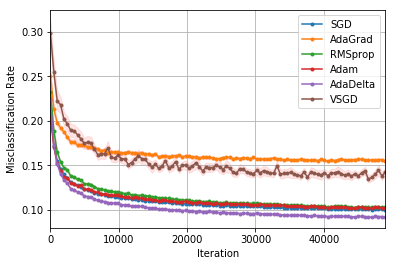

In [5]:
classifiers = [
    ("SGD", stochastic_optimizer.estimator.SGDClassifier(
        n_jobs=10, warm_start=True, eta0=0.5, penalty='l1', alpha=0.0001, power_t=0.5)),
    ("AdaGrad", stochastic_optimizer.estimator.AdaGradClassifier(
        n_jobs=10, warm_start=True, eta0=0.0357, penalty='l1', alpha=0.0006)),
    ("RMSprop", stochastic_optimizer.estimator.RMSpropClassifier(
        n_jobs=10, warm_start=True, eta0=0.0357, var_w=0.89)),
    ("Adam", stochastic_optimizer.estimator.AdamClassifier(
        n_jobs=10, warm_start=True, eta0=0.0357, penalty='l1', alpha=0.0002, var_w=0.45)),
    ("AdaDelta", stochastic_optimizer.estimator.AdaDeltaClassifier(
        n_jobs=10, warm_start=True, penalty=None, var_w=0.01, eps_=7.2e-07)),
    ("VSGD", stochastic_optimizer.estimator.VSGDClassifier(n_jobs=10, warm_start=True))
]

fig = stochastic_optimizer.framework.LearningCurveClassifier(
    X, y, classifiers, rounds=50, split=100, path='example_results/linear_model_mnist_sgd')

In [6]:
import json
mc_rate = json.load(open('./example_results/linear_model_mnist_sgd/misclassification_rate.json'))
print('Misclassification error: mean (std)')
for k, v in mc_rate.items():
    ave = v['mean'][-1]
    std = v['std'][-1]
    print('- %s: %0.4f (%0.4f)' % (k, ave, std))

Misclassification error: mean (std)
- AdaDelta: 0.1027 (0.0017)
- Adam: 0.1118 (0.0018)
- AdaGrad: 0.1627 (0.0020)
- VSGD: 0.1543 (0.0023)
- RMSprop: 0.1146 (0.0019)
- SGD: 0.1103 (0.0019)
